In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [3]:
covid_data = pd.read_csv('us-counties-covid19-20200516.csv')

In [4]:
USA_pop_county = pd.read_csv('USA_state_county_population_data_2010-2019.csv',encoding = "ISO-8859-1")

In [5]:
USA_pop_county = USA_pop_county[['STNAME', 'CTYNAME', 'POPESTIMATE2019']]
USA_pop_county.columns = ['State', 'County', '2019EstPop']
USA_pop_county['State_County'] = USA_pop_county['State'] + "_" + USA_pop_county['County']
USA_pop_county.head()

,State,County,2019EstPop,State_County
0,Alabama,Alabama,4903185,Alabama_Alabama
1,Alabama,Autauga County,55869,Alabama_Autauga County
2,Alabama,Baldwin County,223234,Alabama_Baldwin County
3,Alabama,Barbour County,24686,Alabama_Barbour County
4,Alabama,Bibb County,22394,Alabama_Bibb County


In [6]:
covid_data['county'] = covid_data['county'] + ' County'
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [7]:
covid_data.sort_values(by=['state', 'county'], inplace = True)

In [8]:
covid_data.head()

,date,county,state,fips,cases,deaths,State_County
9480,2020-03-24,Autauga County,Alabama,1001.0,1,0,Alabama_Autauga County
10832,2020-03-25,Autauga County,Alabama,1001.0,4,0,Alabama_Autauga County
12361,2020-03-26,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County
14021,2020-03-27,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County
15801,2020-03-28,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County


In [9]:
covid_data.reset_index(drop=True, inplace = True)

In [10]:
# manually change 'Allen County' in Louisiana to 'Allen Parish' BECAUSE there are also 'Allen County' in other states
covid_data.iloc[list(covid_data[covid_data['county'] == 'Allen County'][covid_data['state'] == 'Louisiana'].index),1] = 'Allen Parish'

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [11]:
# manually change 'Orleans County' in Louisiana to 'Orleans Parish' BECAUSE there are also 'Orleans County' in other states; similar for other counties
covid_data.iloc[list(covid_data[covid_data['county'] == 'Orleans County'][covid_data['state'] == 'Louisiana'].index),1] = 'Orleans Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Jefferson County'][covid_data['state'] == 'Louisiana'].index),1] = 'Jefferson Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Lafayette County'][covid_data['state'] == 'Louisiana'].index),1] = 'Lafayette Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Caddo County'][covid_data['state'] == 'Louisiana'].index),1] = 'Caddo Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'St. Charles County'][covid_data['state'] == 'Louisiana'].index),1] = 'St. Charles Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Ouachita County'][covid_data['state'] == 'Louisiana'].index),1] = 'Ouachita Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'District of Columbia County'][covid_data['state'] == 'District of Columbia'].index),1] = 'District of Columbia'
covid_data.iloc[list(covid_data[covid_data['county'] == 'New York City County'].index),1] = 'New York City'

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

In [12]:
# note the left join when merging COVID-19 dataset with US population dataset
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [13]:
covid_data[covid_data['date'] == covid_data.date.max()][covid_data['state'] == 'Illinois'].head(20)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date,county,state,fips,cases,deaths,State_County,State,County,2019EstPop
31371,2020-05-16,Adams County,Illinois,17001.0,42,1,Illinois_Adams County,Illinois,Adams County,65435.0
31402,2020-05-16,Alexander County,Illinois,17003.0,8,0,Illinois_Alexander County,Illinois,Alexander County,5761.0
31451,2020-05-16,Bond County,Illinois,17005.0,11,1,Illinois_Bond County,Illinois,Bond County,16426.0
31493,2020-05-16,Boone County,Illinois,17007.0,282,14,Illinois_Boone County,Illinois,Boone County,53544.0
31509,2020-05-16,Brown County,Illinois,17009.0,10,0,Illinois_Brown County,Illinois,Brown County,6578.0
31560,2020-05-16,Bureau County,Illinois,17011.0,15,1,Illinois_Bureau County,Illinois,Bureau County,32628.0
31602,2020-05-16,Calhoun County,Illinois,17013.0,1,0,Illinois_Calhoun County,Illinois,Calhoun County,4739.0
31652,2020-05-16,Carroll County,Illinois,17015.0,13,2,Illinois_Carroll County,Illinois,Carroll County,14305.0
31679,2020-05-16,Cass County,Illinois,17017.0,63,0,Illinois_Cass County,Illinois,Cass County,12147.0
31735,2020-05-16,Champaign County,Illinois,17019.0,366,7,Illinois_Champaign County,Illinois,Champaign County,209689.0


In [14]:
covid_data.drop(columns = ['State', 'County', 'fips'], inplace = True)

#### List of County Names to be Re-Named (to be properly joined with USA population file)

In [15]:
county_list1 = ['Acadia County', 
                'Alexandria city County', 
                'Anchorage County', 
                'Ascension County', 
                'Assumption County',
                'Avoyelles County', 
                'Fairbanks North Star Borough County', 
                'Juneau City and Borough County',
                'St. Tammany County', 
                'East Baton Rouge County', 
                'Baltimore city County', 
                'St. Louis city County',
                'St. John the Baptist County',
                'District of Columbia County',
                'Kansas City County',
                'St. Bernard County',
                'Lafourche County',
                'Virginia Beach city County',
                'St. James County',
                'Bossier County']
county_list2 = ['Acadia Parish',
                'Alexandria city',
                'Anchorage Municipality',
                'Ascension Parish',
                'Assumption Parish',
                'Avoyelles Parish',
                'Fairbanks North Star Borough',
                'Juneau City and Borough',
                'St. Tammany Parish',
                'East Baton Rouge Parish',
                'Baltimore city',
                'St. Louis city',
                'St. John the Baptist Parish',
                'District of Columbia',
                'Kansas City',
                'St. Bernard Parish',
                'Lafourche Parish',
                'Virginia Beach city', 
                'St. James Parish',
                'Bossier Parish']

In [16]:
covid_data.replace(to_replace = county_list1, value = county_list2, inplace = True)

In [17]:
covid_data.drop(columns = 'State_County', inplace = True)

In [18]:
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [19]:
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [20]:
covid_data.drop(columns = ['State', 'County', '2019EstPop_x'], inplace = True)

In [21]:
covid_data.rename(columns={'2019EstPop_y':'2019EstPop'}, inplace = True)

In [22]:
covid_data.head()

,date,county,state,cases,deaths,State_County,2019EstPop
0,2020-03-24,Autauga County,Alabama,1,0,Alabama_Autauga County,55869.0
1,2020-03-25,Autauga County,Alabama,4,0,Alabama_Autauga County,55869.0
2,2020-03-26,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0
3,2020-03-27,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0
4,2020-03-28,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0


In [23]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [24]:
covid_data.dtypes

date            datetime64[ns]
county                  object
state                   object
cases                    int64
deaths                   int64
State_County            object
2019EstPop             float64
dtype: object

In [25]:
covid_data_US = covid_data.groupby('date')['cases', 'deaths'].sum()
covid_data_US = covid_data_US[covid_data_US.index > '2020-03-02']

In [26]:
covid_data['CasesPer100000'] = covid_data['cases'] / (covid_data['2019EstPop'] / 100000)
covid_data['DeathsPer100000'] = covid_data['deaths'] / (covid_data['2019EstPop'] / 100000)

In [27]:
states = ['Illinois', 'Michigan', 'New York', 'Washington', 'California', 'Louisiana', 'Florida']
date_recent = '2020-03-10'

In [28]:
covid_st = covid_data[covid_data.state.isin(states)]

In [29]:
states = list(set(covid_data['state']))
states.sort()

In [30]:
covid_st.loc[:,'date'] = pd.to_datetime(covid_st.loc[:,'date'])

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
covid_st = covid_st[covid_st['date'] > date_recent]

In [32]:
covid_st_IL = covid_st[covid_st['state'] == 'Illinois']
covid_st_MI = covid_st[covid_st['state'] == 'Michigan']

In [33]:
covid_st_IL_summ = covid_st_IL.groupby('date')['cases','deaths'].sum()
covid_st_MI_summ = covid_st_MI.groupby('date')['cases','deaths'].sum()

In [34]:
covid_st_IL_summ.tail()

,cases,deaths
date,,
2020-05-12,83168,3617
2020-05-13,84874,3815
2020-05-14,88081,3945
2020-05-15,90528,4075
2020-05-16,92669,4149


In [35]:
92669 - 92669

0

In [37]:
covid_IL_daily = covid_st_IL_summ.diff()
covid_IL_daily.columns = ['newcases_daily', 'newdeaths_daily']

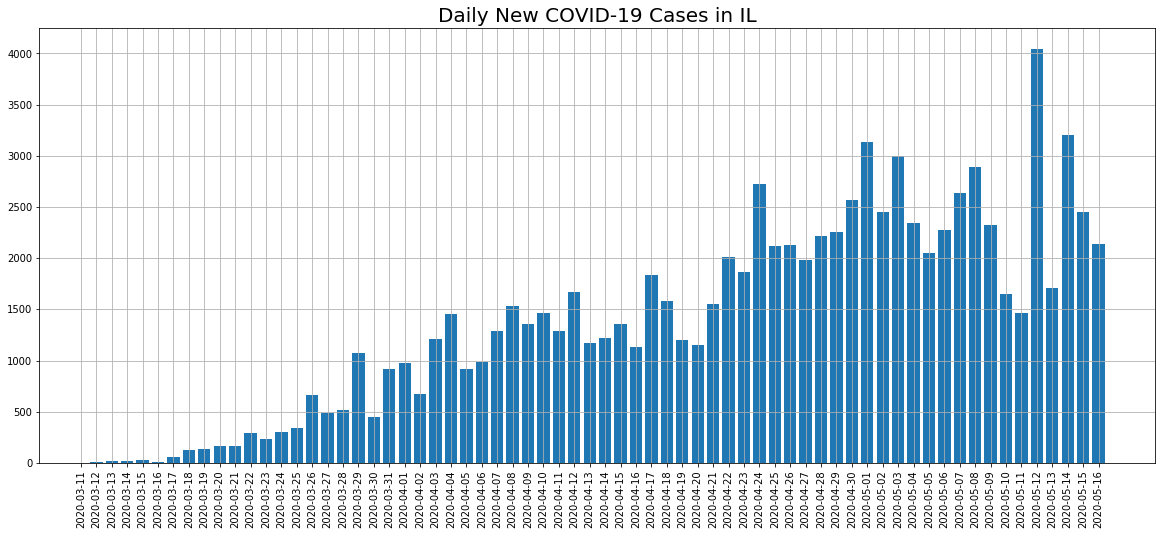

In [40]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in IL', fontsize = '20')
plt.bar(covid_IL_daily.index, covid_IL_daily.newcases_daily)

# y_ticks = np.linspace(0,3200,9)
plt.xticks(covid_IL_daily.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [41]:
covid_st_IL_summ_pct = covid_st_IL_summ.pct_change()
covid_st_IL_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

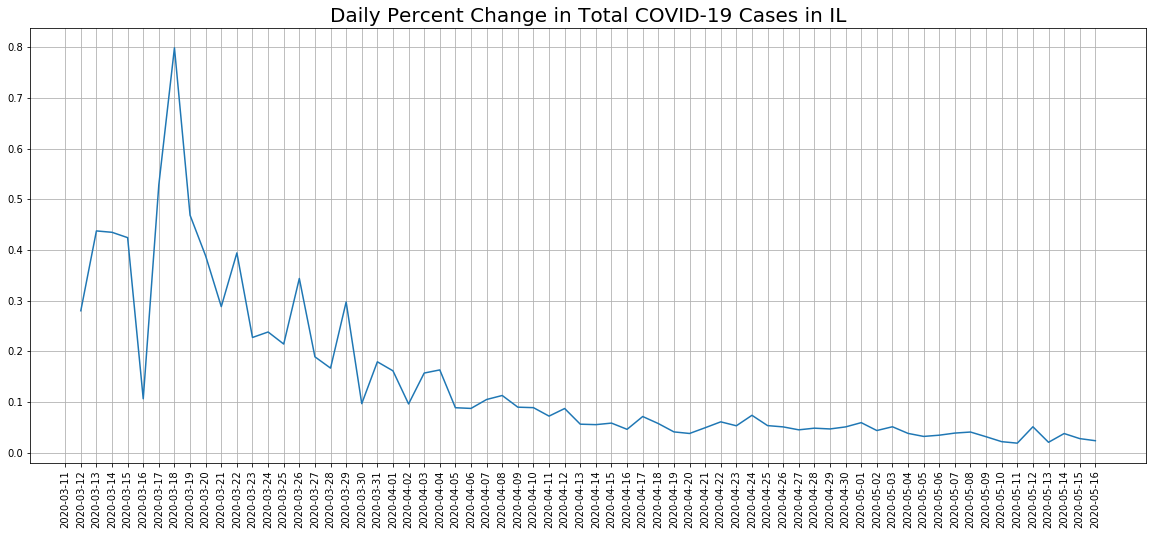

In [42]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in IL', fontsize = '20')
plt.plot(covid_st_IL_summ_pct.index, covid_st_IL_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_st_IL_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [43]:
# Cook County passed 100+ cases on 2020-03-17, look at data past that date
covid_data_IL_Cook = covid_data[covid_data['State_County'] == 
           'Illinois_Cook County'][covid_data['date'] > '2020-03-16'][['date', 'cases', 'deaths']]
covid_data_IL_Cook.set_index('date', inplace=True)

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
covid_data_IL_Cook.tail()

,cases,deaths
date,,
2020-05-12,55470,2449
2020-05-13,56406,2589
2020-05-14,58457,2675
2020-05-15,59905,2762
2020-05-16,61212,2814


In [45]:
36006 + 25206    # number of cases as of 2020-05-16 per http://www.dph.illinois.gov/covid19/covid19-statistics

61212

In [46]:
61212 - 61212    # number of daily new cases on 2020-05-04

0

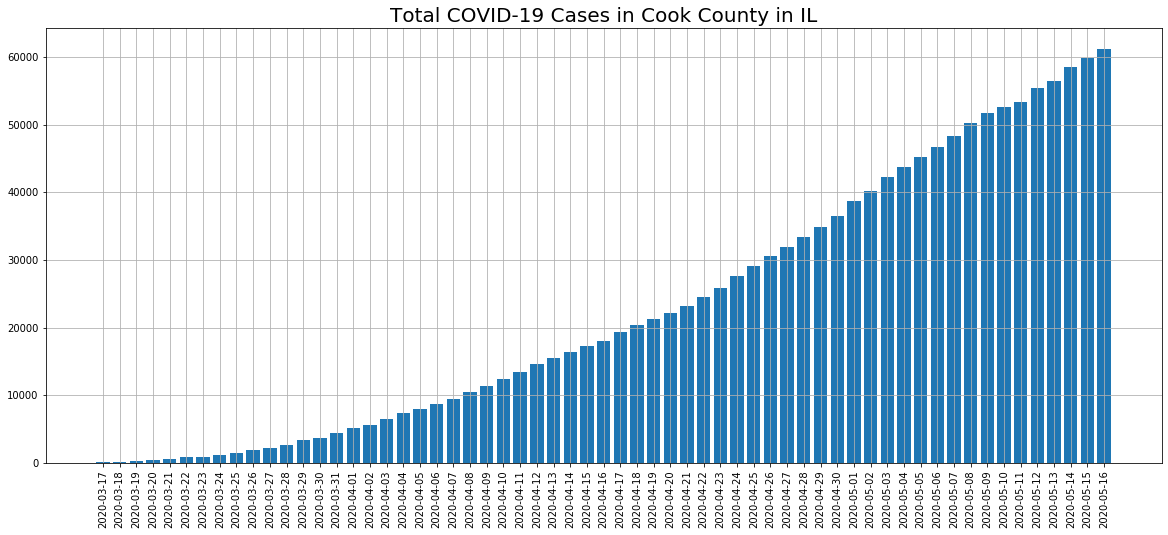

In [48]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook.index, covid_data_IL_Cook.cases)

# y_ticks = np.linspace(0,45000,10)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90)
# plt.yticks(y_ticks)

plt.savefig('Total_COVID19_Cases_CookCounty_IL');

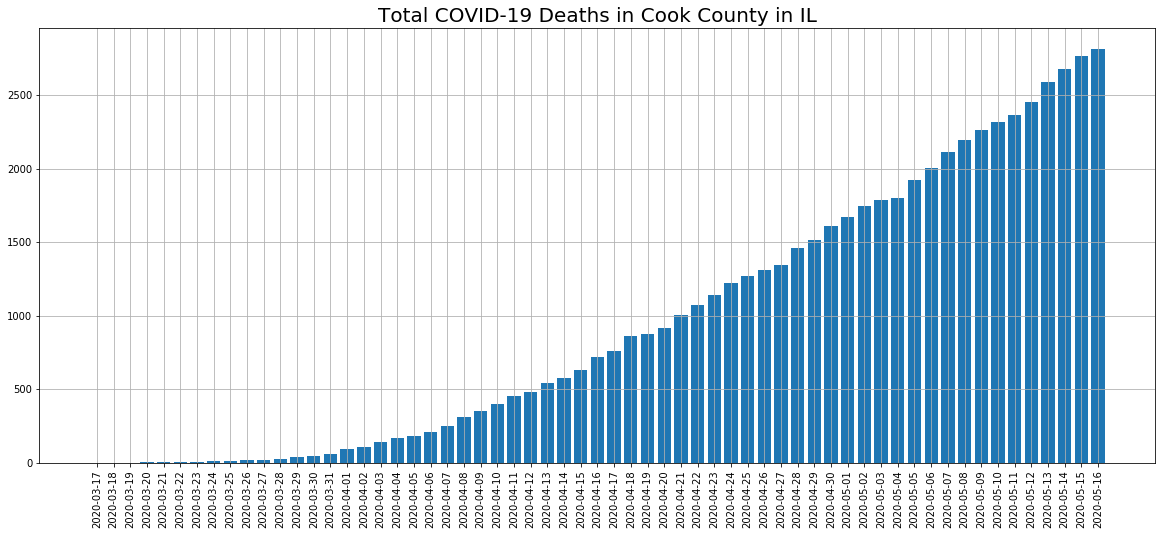

In [49]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook.index, covid_data_IL_Cook.deaths)

# y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks)

# plt.savefig('Total_COVID19_Deaths_CookCounty_IL');

In [50]:
covid_data_IL_Cook_daily = covid_data_IL_Cook.diff()
covid_data_IL_Cook_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [51]:
covid_data_IL_Cook_daily.reset_index(inplace=True)

In [52]:
covid_data_IL_Cook_daily.tail()

,date,newcases_daily,newdeaths_daily
56,2020-05-12,2089.0,88.0
57,2020-05-13,936.0,140.0
58,2020-05-14,2051.0,86.0
59,2020-05-15,1448.0,87.0
60,2020-05-16,1307.0,52.0


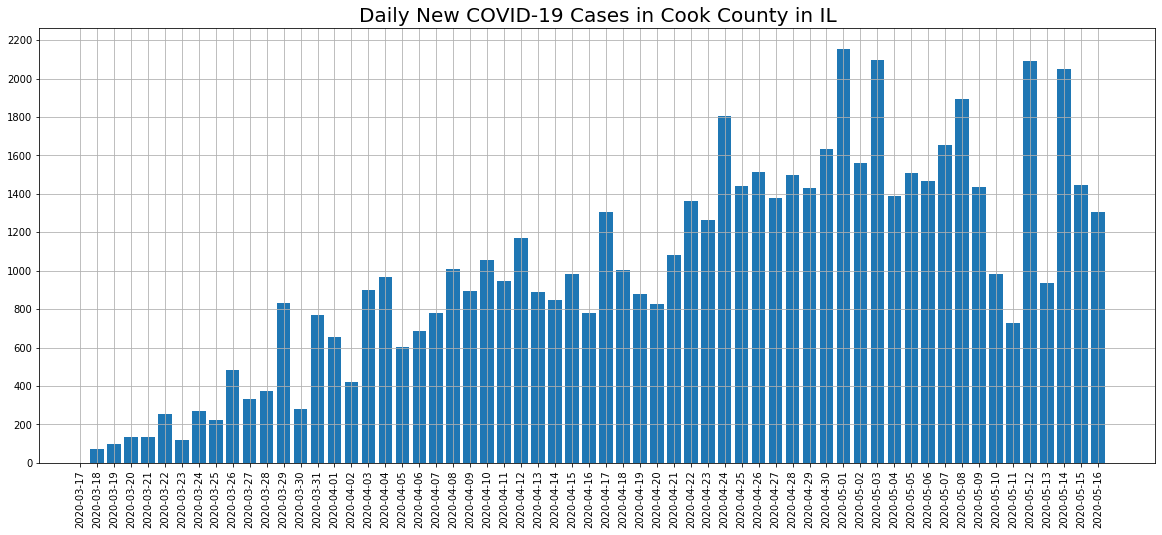

In [53]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily.newcases_daily)

y_ticks = np.linspace(0,2200,12)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

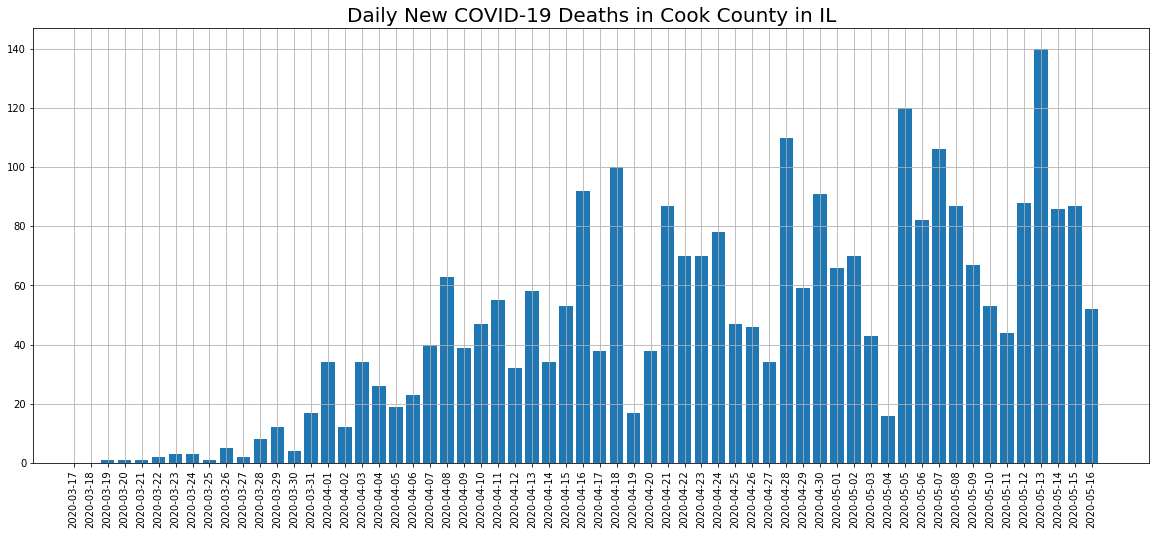

In [54]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily.newdeaths_daily)

# y_ticks = np.linspace(0,100,11)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [55]:
# num_avg is the number of days for average_dailynewcases
num_avg = 3

In [56]:
covid_data_IL_Cook_daily[str(num_avg) + 'davg_dailynewcases'] = np.nan

In [57]:
# for loop to create/populate new column '#davg_dailynewcases'
for i in range(0,len(covid_data_IL_Cook_daily)):
    if i <= (num_avg - 1):
        covid_data_IL_Cook_daily.iloc[i,num_avg] = np.nan
    else:
        list1 = []
        for j in range(num_avg-1, -1, -1):
            list1.append(covid_data_IL_Cook_daily.iloc[i-j,1])
            covid_data_IL_Cook_daily.iloc[i,3] = sum(list1) / num_avg

In [58]:
# covid_data_IL_Cook_daily.drop(columns=['5davg_dailynewcases'],inplace=True)

In [61]:
covid_data_IL_Cook_daily.tail()

,date,newcases_daily,newdeaths_daily,3davg_dailynewcases
56,2020-05-12,2089.0,88.0,1265.333333
57,2020-05-13,936.0,140.0,1250.333333
58,2020-05-14,2051.0,86.0,1692.000000
59,2020-05-15,1448.0,87.0,1478.333333
60,2020-05-16,1307.0,52.0,1602.000000


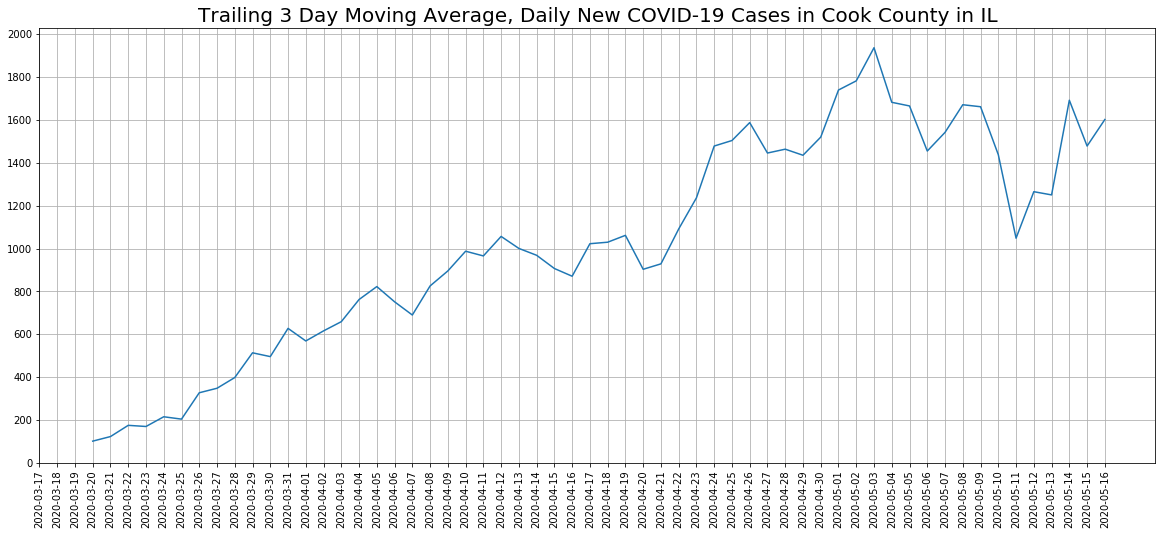

In [64]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Trailing 3 Day Moving Average, Daily New COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily['3davg_dailynewcases'])

y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [65]:
covid_data_IL_Cook_pct = covid_data_IL_Cook.pct_change()
covid_data_IL_Cook_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

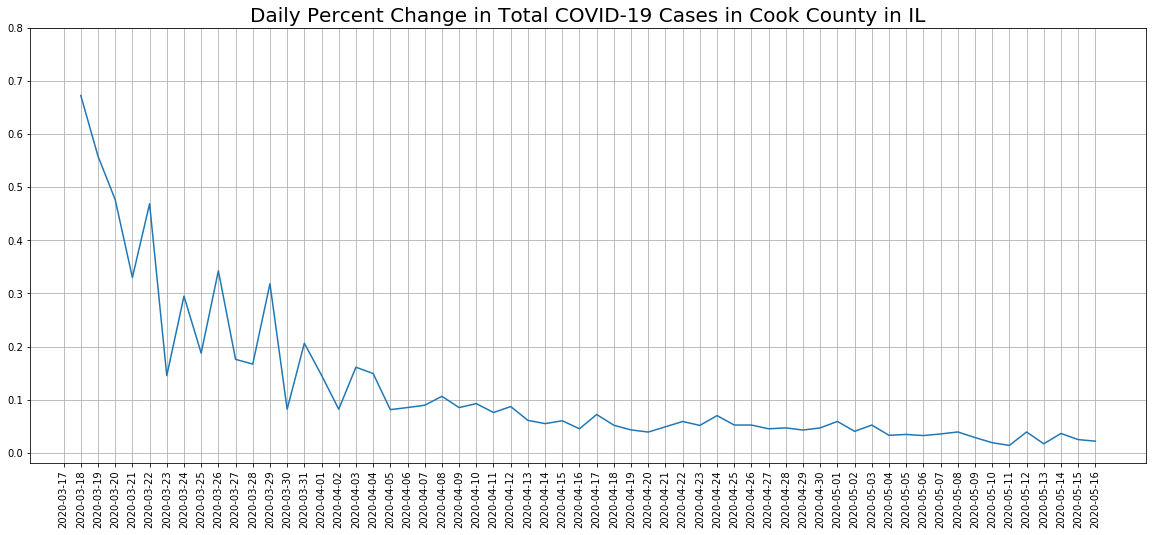

In [66]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook_pct.index, covid_data_IL_Cook_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_data_IL_Cook_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [67]:
covid_MI_OAK = covid_st_MI[covid_st_MI['county'] == 'Oakland County'].groupby('date')['cases','deaths'].sum()

In [68]:
covid_MI_OAK.tail()

,cases,deaths
date,,
2020-05-12,7784,872
2020-05-13,7830,874
2020-05-14,7952,888
2020-05-15,7994,896
2020-05-16,8023,910


In [69]:
8023 - 8023       # calculate daily new cases for Oakland County, MI for 2020-05-17

0

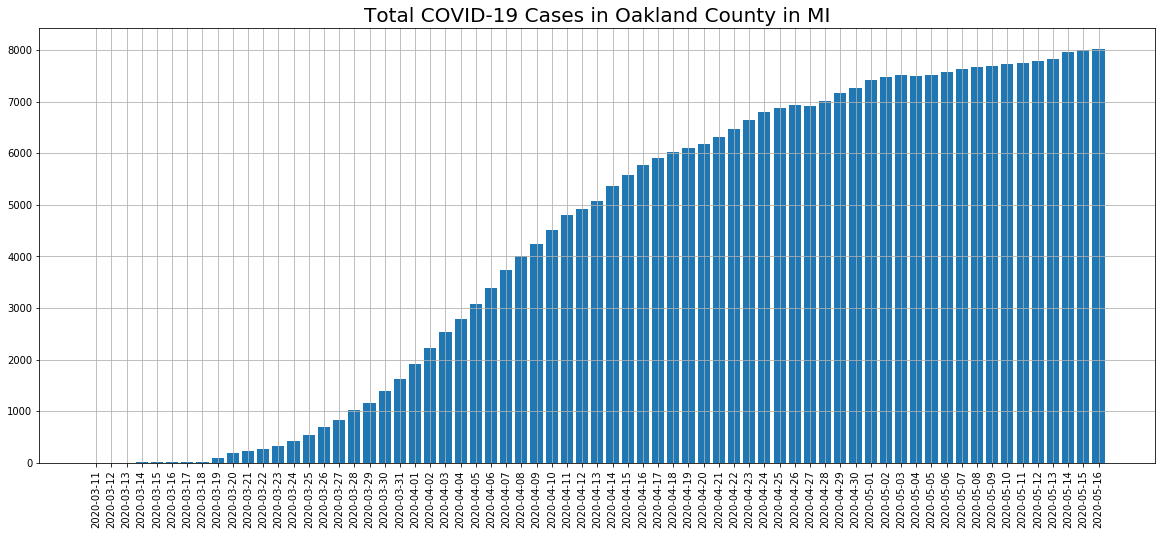

In [70]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK.index, covid_MI_OAK.cases)

# y_ticks = np.linspace(0,7500,16)
plt.xticks(covid_MI_OAK.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks)

plt.savefig('Total_COVID19_Cases_OaklandCounty_MI');

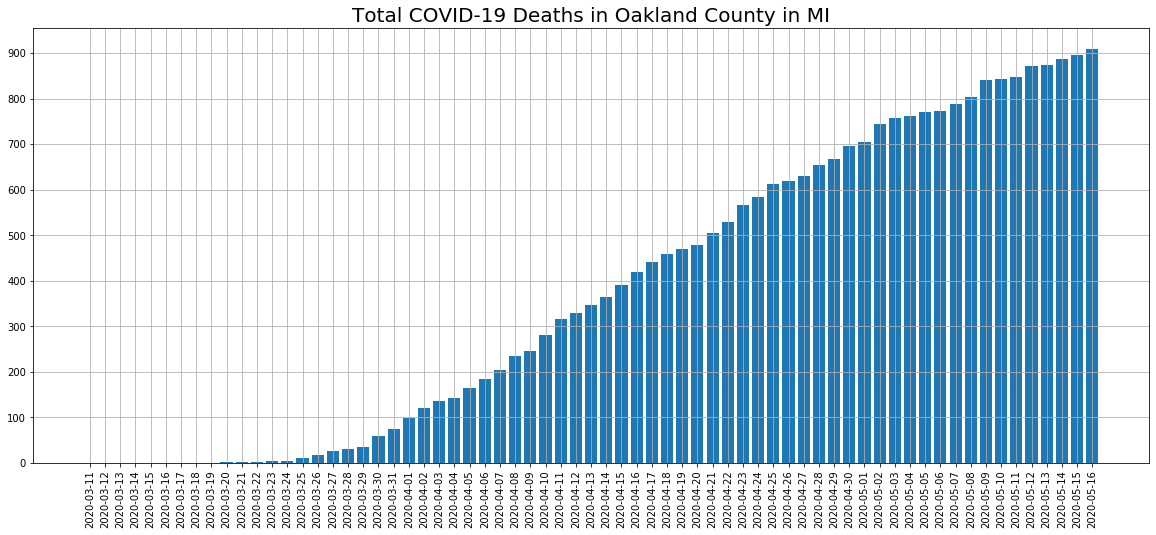

In [72]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK.index, covid_MI_OAK.deaths)

y_ticks = np.linspace(0,900,10)
plt.xticks(covid_MI_OAK.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

# plt.savefig('Total_COVID19_Deaths_OaklandCounty_MI');

In [73]:
covid_MI_OAK_daily = covid_MI_OAK.diff()
covid_MI_OAK_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [74]:
covid_MI_OAK_daily.tail()

,newcases_daily,newdeaths_daily
date,,
2020-05-12,32.0,23.0
2020-05-13,46.0,2.0
2020-05-14,122.0,14.0
2020-05-15,42.0,8.0
2020-05-16,29.0,14.0


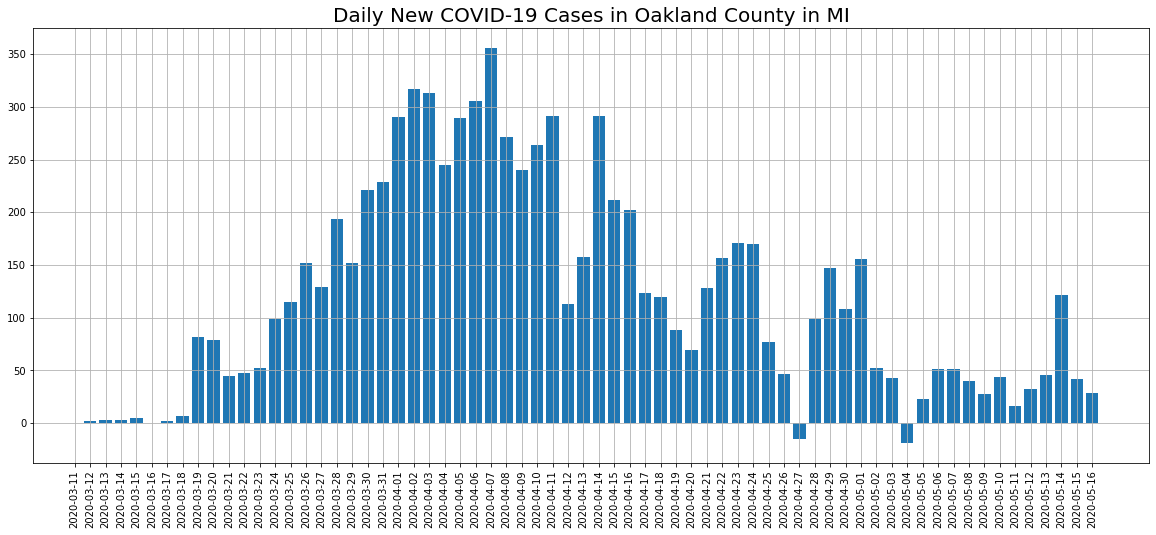

In [75]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK_daily.index, covid_MI_OAK_daily.newcases_daily)

plt.xticks(covid_MI_OAK_daily.index, fontsize = '10', rotation = 90);

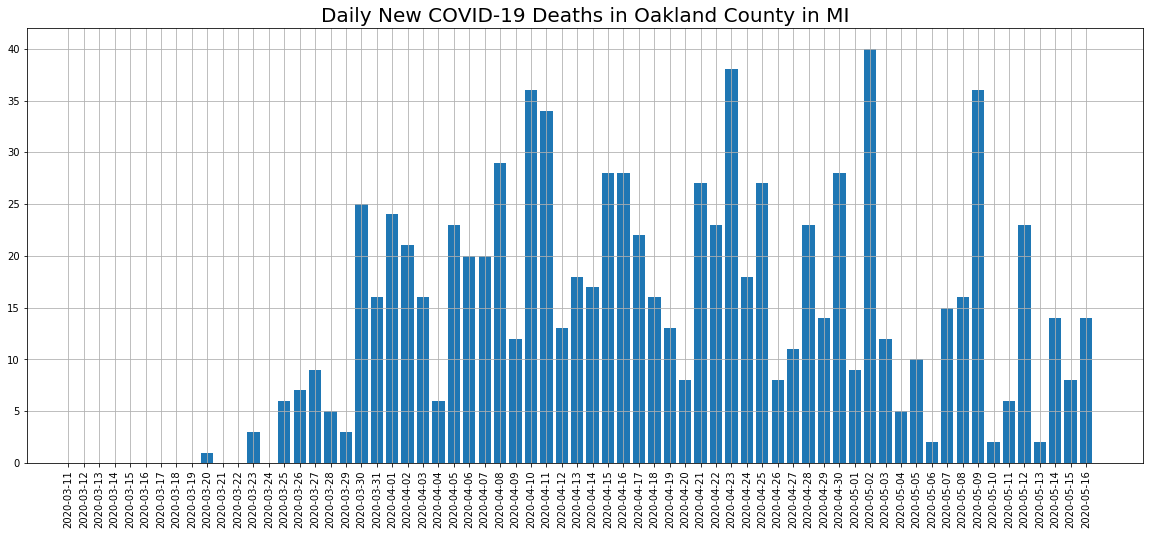

In [76]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK_daily.index, covid_MI_OAK_daily.newdeaths_daily)

plt.xticks(covid_MI_OAK_daily.index, fontsize = '10', rotation = 90);

In [77]:
# there was a large spike on 3/19/2020 so look at the daily % change after that date
covid_MI_OAK_pct = covid_MI_OAK[covid_MI_OAK.index > '2020-03-19'].pct_change()
covid_MI_OAK_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

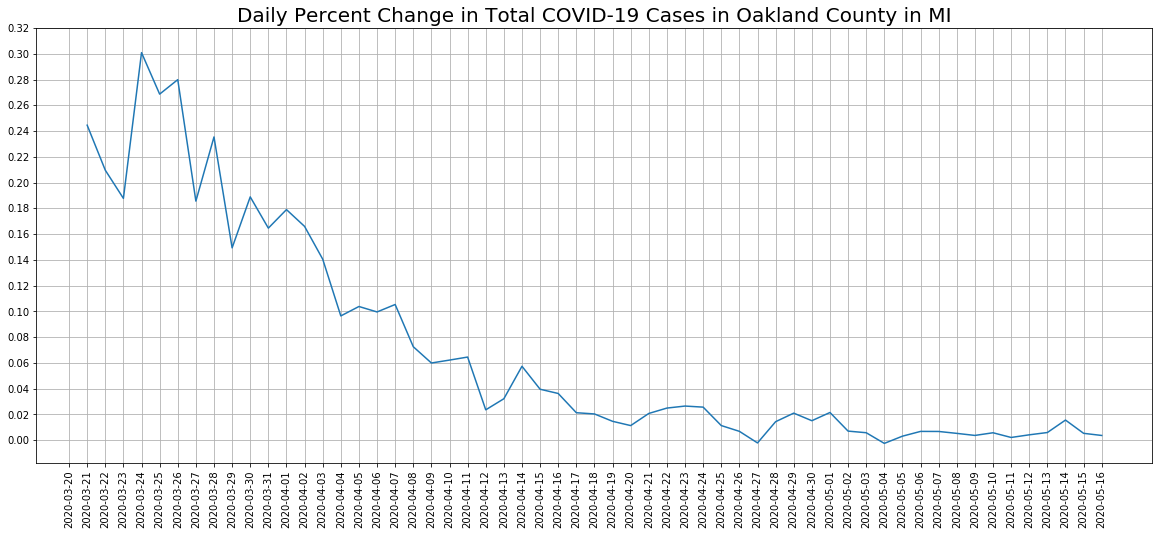

In [82]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_pct.index, covid_MI_OAK_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.32,17)
plt.xticks(covid_MI_OAK_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [83]:
# 10 deaths on 2020-03-25, look at data after that date
covid_MI_OAK_cum = covid_MI_OAK[covid_MI_OAK.index > '2020-03-24']
covid_MI_OAK_cum

,cases,deaths
date,,
2020-03-25,543,10
2020-03-26,695,17
2020-03-27,824,26
2020-03-28,1018,31
2020-03-29,1170,34
2020-03-30,1391,59
2020-03-31,1620,75
2020-04-01,1910,99
2020-04-02,2227,120


In [84]:
cases_day0 = covid_MI_OAK_cum.iloc[0,0]
deaths_day0 = covid_MI_OAK_cum.iloc[0,1]
print(cases_day0)
print(deaths_day0)

543
10


In [85]:
covid_MI_OAK_cum['cum_pctchange_cases'] = covid_MI_OAK_cum['cases'] / cases_day0
covid_MI_OAK_cum['cum_pctchange_deaths'] = covid_MI_OAK_cum['deaths'] / deaths_day0

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
covid_MI_OAK_pct

,cases_dailypctchange,deaths_dailypctchange
date,,
2020-03-20,NaN,NaN
2020-03-21,0.244565,0.000000
2020-03-22,0.209607,0.000000
2020-03-23,0.187726,3.000000
2020-03-24,0.300912,0.000000
2020-03-25,0.268692,1.500000
2020-03-26,0.279926,0.700000
2020-03-27,0.185612,0.529412
2020-03-28,0.235437,0.192308


In [87]:
covid_MI_OAK_cum['daily_pctchange_cases'] = [covid_MI_OAK_pct.loc[i, 'cases_dailypctchange'] for i in list(covid_MI_OAK_cum.index)]
covid_MI_OAK_cum['daily_pctchange_deaths'] = [covid_MI_OAK_pct.loc[i, 'deaths_dailypctchange'] for i in list(covid_MI_OAK_cum.index)]

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
covid_MI_OAK_cum

,cases,deaths,cum_pctchange_cases,cum_pctchange_deaths,daily_pctchange_cases,daily_pctchange_deaths
date,,,,,,
2020-03-25,543,10,1.000000,1.0,0.268692,1.500000
2020-03-26,695,17,1.279926,1.7,0.279926,0.700000
2020-03-27,824,26,1.517495,2.6,0.185612,0.529412
2020-03-28,1018,31,1.874770,3.1,0.235437,0.192308
2020-03-29,1170,34,2.154696,3.4,0.149312,0.096774
2020-03-30,1391,59,2.561694,5.9,0.188889,0.735294
2020-03-31,1620,75,2.983425,7.5,0.164630,0.271186
2020-04-01,1910,99,3.517495,9.9,0.179012,0.320000
2020-04-02,2227,120,4.101289,12.0,0.165969,0.212121


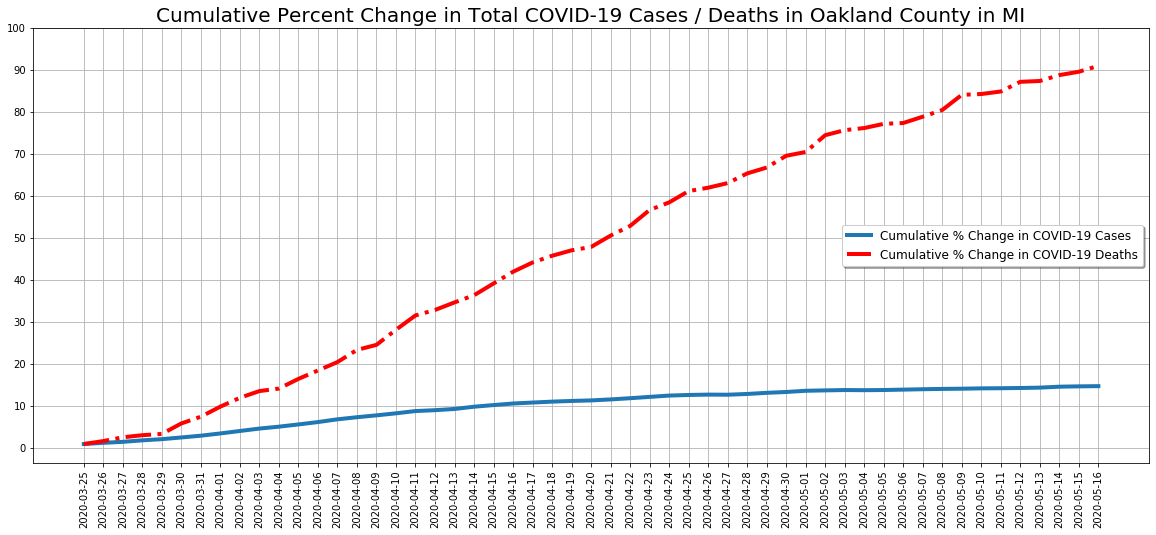

In [91]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Cumulative Percent Change in Total COVID-19 Cases / Deaths in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_cum.index, covid_MI_OAK_cum.cum_pctchange_cases, linewidth = 4, linestyle = '-')
plt.plot(covid_MI_OAK_cum.index, covid_MI_OAK_cum.cum_pctchange_deaths, linewidth = 4, color = 'r', linestyle = '-.')

ticks_y = np.linspace(0,100,11)
plt.xticks(covid_MI_OAK_cum.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10')
plt.legend(['Cumulative % Change in COVID-19 Cases','Cumulative % Change in COVID-19 Deaths'], 
           shadow = True, loc = 5, fontsize = '12');

In [92]:
covid_MI_OAK['death_rate'] = covid_MI_OAK['deaths'] / covid_MI_OAK['cases']

In [93]:
covid_MI_OAK_deathrate = covid_MI_OAK[covid_MI_OAK.index > '2020-03-19']
covid_MI_OAK_deathrate.tail()

,cases,deaths,death_rate
date,,,
2020-05-12,7784,872,0.112025
2020-05-13,7830,874,0.111622
2020-05-14,7952,888,0.111670
2020-05-15,7994,896,0.112084
2020-05-16,8023,910,0.113424


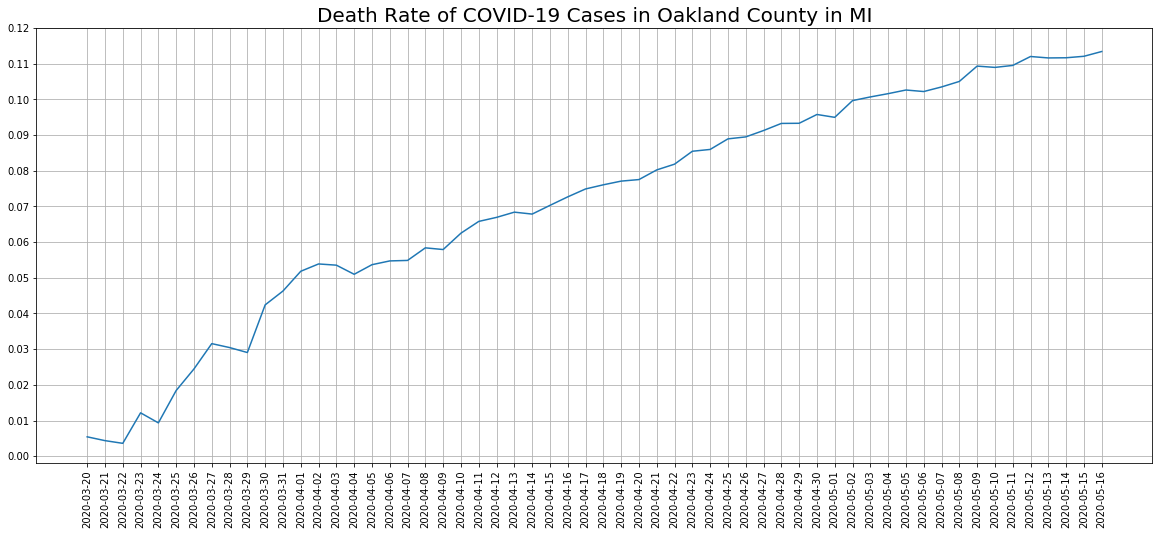

In [95]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_deathrate.index, covid_MI_OAK_deathrate.death_rate)

ticks_y = np.linspace(0,0.12,13)
plt.xticks(covid_MI_OAK_deathrate.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [96]:
covid_MI_Wayne = covid_st_MI[covid_st_MI['county'] == 'Wayne County'][['date', 'cases', 'deaths']]
covid_MI_Wayne.set_index('date', inplace=True)

In [97]:
covid_MI_Wayne.tail()

,cases,deaths
date,,
2020-05-12,18274,2140
2020-05-13,18389,2156
2020-05-14,18770,2183
2020-05-15,18882,2192
2020-05-16,19016,2212


In [98]:
10327 + 8689     # Detroit City + Wayne County cases as of 2020-05-16 per https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html

19016

In [99]:
19016 - 19016    # calculate daily new cases on 2020-05-17

0

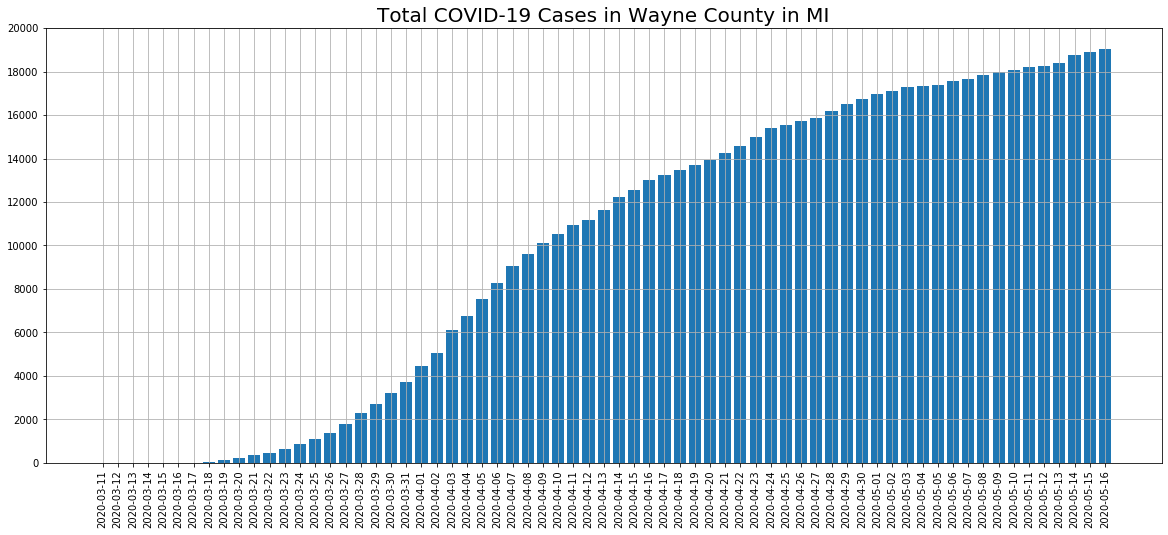

In [102]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne.index, covid_MI_Wayne.cases)

y_ticks = np.linspace(0,20000,11)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks, fontsize = '10')

plt.savefig('Total_COVID19_Cases_WayneCounty_MI');
# plt.yticks(y_ticks);

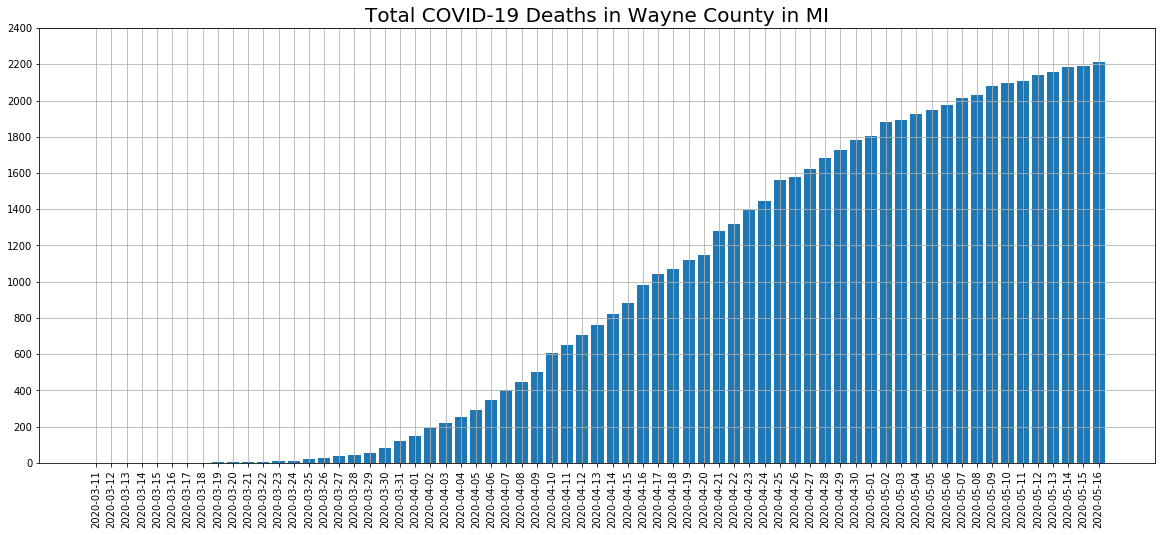

In [104]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne.index, covid_MI_Wayne.deaths)

y_ticks = np.linspace(0,2400,13)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

# plt.savefig('Total_COVID19_Cases_WayneCounty_MI');

In [105]:
covid_MI_Wayne_daily = covid_MI_Wayne.diff()
covid_MI_Wayne_daily.columns = ['newcases_daily', 'newdeaths_daily']

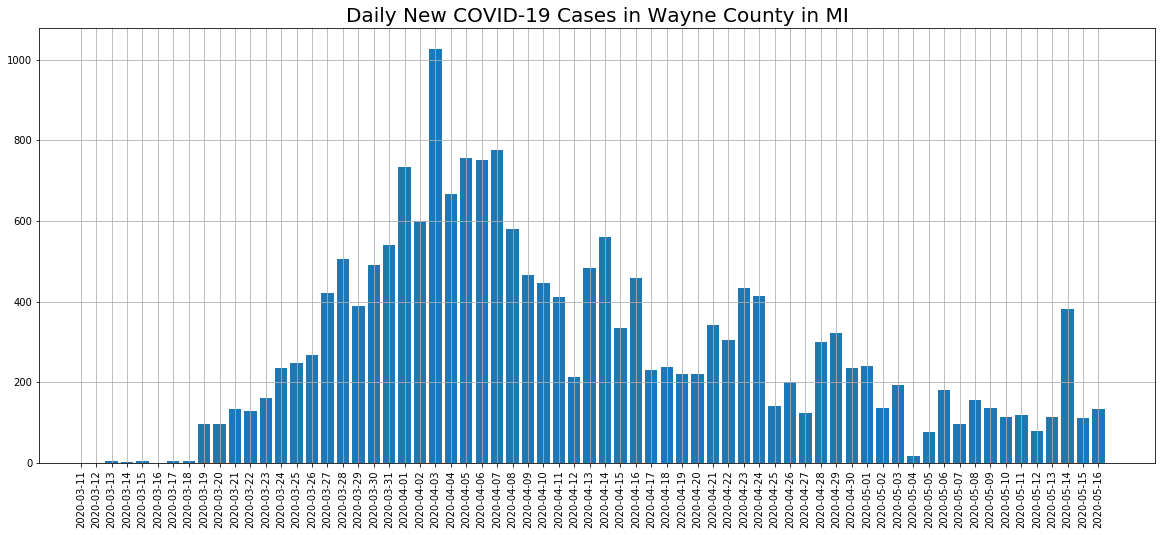

In [106]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne_daily.index, covid_MI_Wayne_daily.newcases_daily)

plt.xticks(covid_MI_Wayne_daily.index, fontsize = '10', rotation = 90);

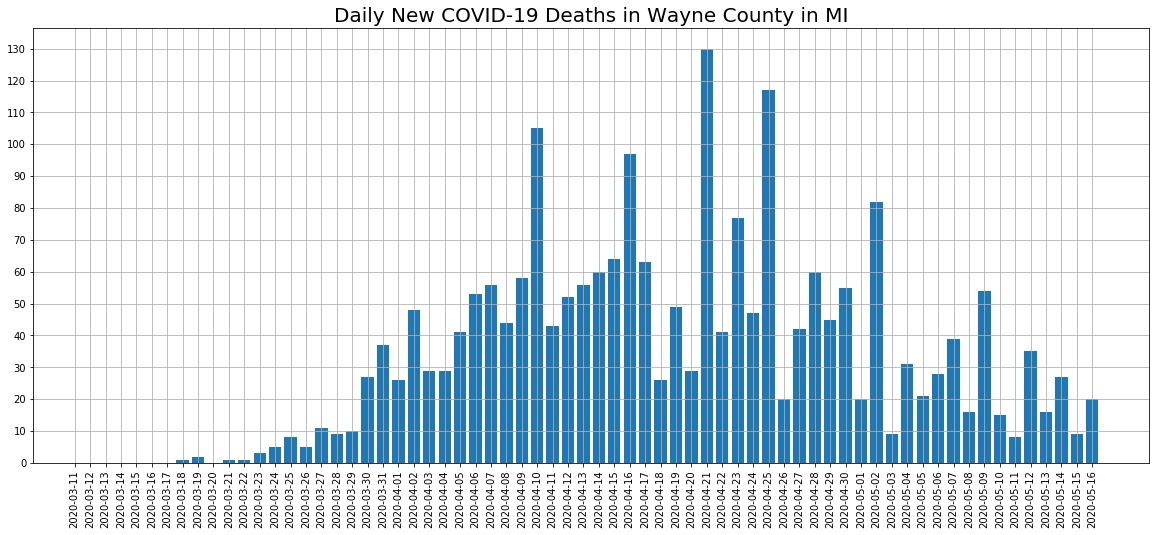

In [107]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne_daily.index, covid_MI_Wayne_daily.newdeaths_daily)

y_ticks = np.linspace(0,130,14)
plt.xticks(covid_MI_Wayne_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [108]:
# large spike on 2020-03-19 so look at data after that date
covid_MI_Wayne_pct = covid_MI_Wayne[covid_MI_Wayne.index > '2020-03-19'].pct_change()
covid_MI_Wayne_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

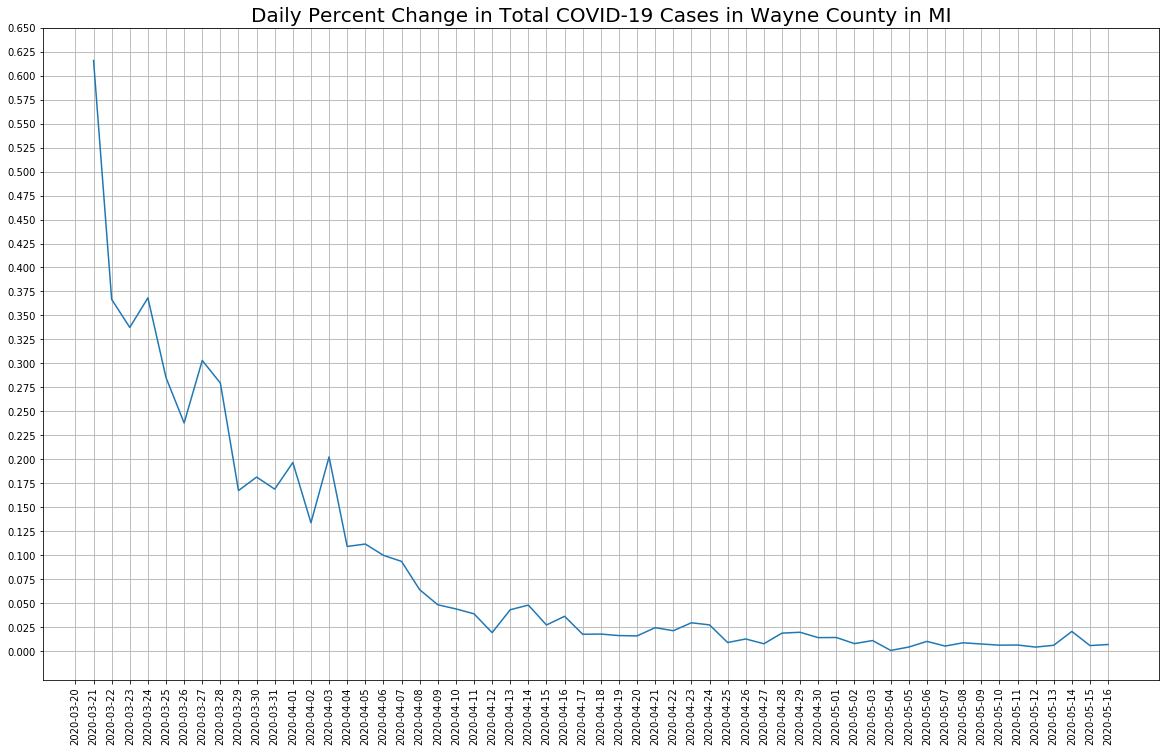

In [114]:
plt.figure(figsize=[20,12])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.plot(covid_MI_Wayne_pct.index, covid_MI_Wayne_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.65,27)
plt.xticks(covid_MI_Wayne_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [115]:
covid_MI_Wayne['death_rate'] = covid_MI_Wayne['deaths'] / covid_MI_Wayne['cases']

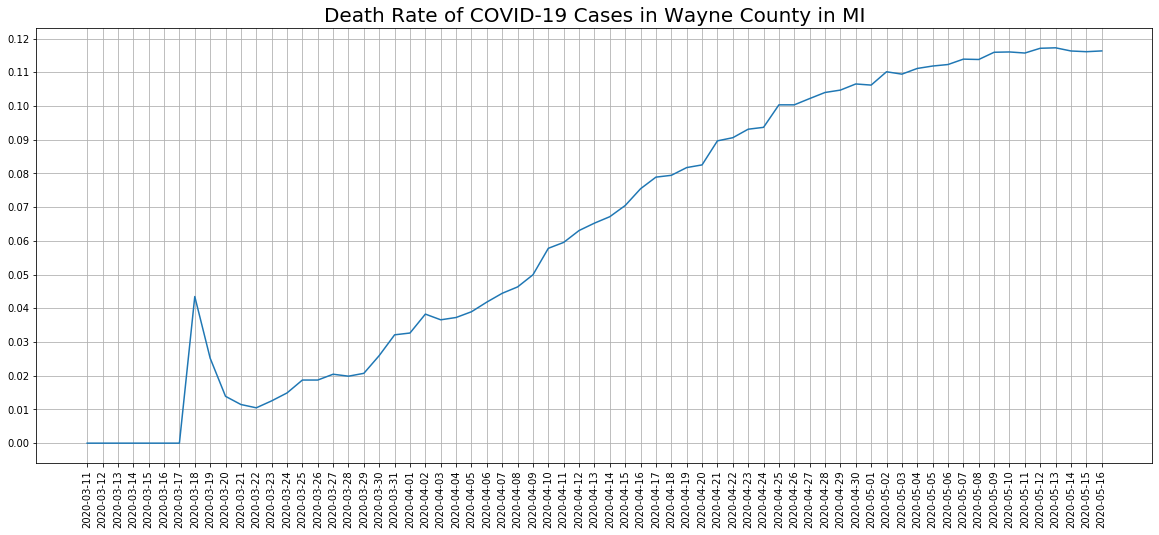

In [116]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.plot(covid_MI_Wayne.index, covid_MI_Wayne.death_rate)

ticks_y = np.linspace(0,0.12,13)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [117]:
covid_st_MI_daily = covid_st_MI_summ.diff()
covid_st_MI_daily.columns = ['newcases_daily', 'newdeaths_daily']

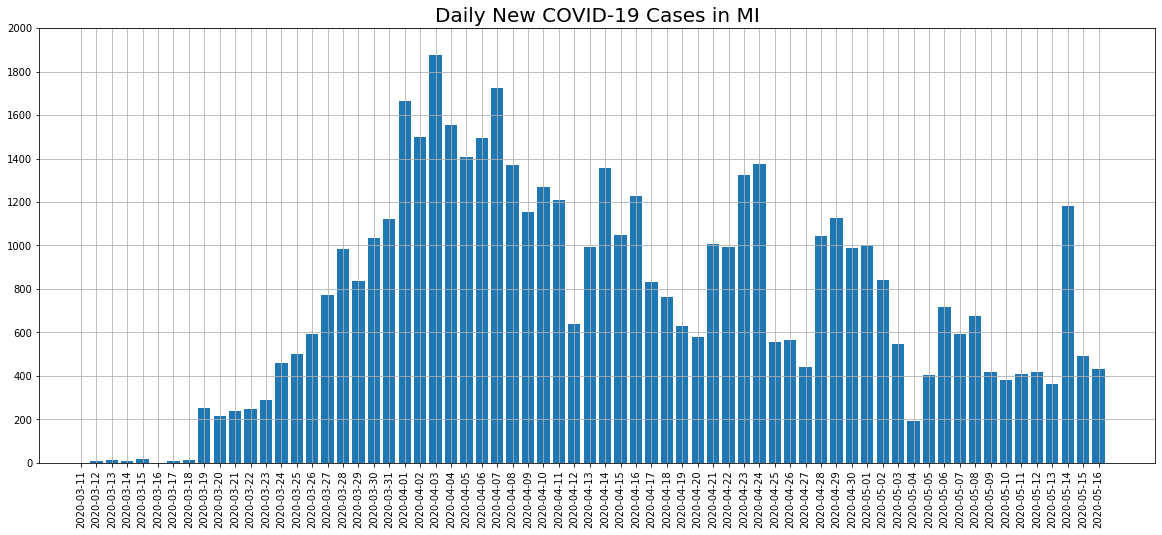

In [118]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in MI', fontsize = '20')
plt.bar(covid_st_MI_daily.index, covid_st_MI_daily.newcases_daily)

y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_st_MI_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [119]:
# changed the date range for MI because there was a >300% increase in total # cases on 3/19/2019 (skews y-axis)
covid_st_MI_summ_pct = covid_st_MI_summ[covid_st_MI_summ.index > '2020-03-19'].pct_change()
covid_st_MI_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

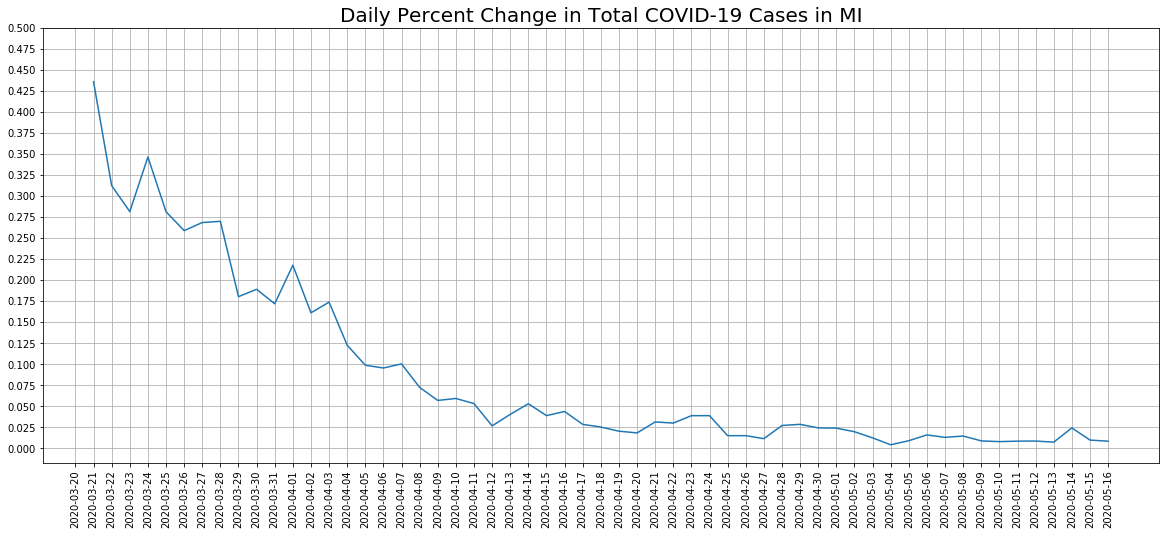

In [122]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in MI', fontsize = '20')
plt.plot(covid_st_MI_summ_pct.index, covid_st_MI_summ_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.50,21)
plt.xticks(covid_st_MI_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

## COVID-19 Data (Latest Data)

In [123]:
covid_data_latest = covid_data[covid_data['date'] == covid_data.date.max()]

In [124]:
covid_data_latest_sum = covid_data_latest.groupby('state')['cases','deaths'].sum()

In [125]:
covid_data_latest_sum = covid_data_latest_sum.sort_values(by='cases', ascending=False)

In [126]:
covid_data_latest_sum['death_rate'] = covid_data_latest_sum['deaths'] / covid_data_latest_sum['cases']

In [127]:
covid_data_latest.loc[:,'CasesPer100000_dup'] = covid_data_latest['CasesPer100000']
covid_data_latest.loc[:,'DeathsPer100000_dup'] = covid_data_latest['DeathsPer100000']
covid_data_latest.loc[:,'2019EstPop_dup'] = covid_data_latest['2019EstPop']

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [128]:
covid_data_latest.loc[:, 'CasesPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, 'DeathsPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, '2019EstPop_dup'] = covid_data_latest.rank(pct=True)

In [129]:
covid_data_latest.rename(columns={'CasesPer100000_dup':'Pctile_CasesPer100000', 'DeathsPer100000_dup':'Pctile_DeathsPer100000', '2019EstPop_dup':'Pctile_2019EstPop'}, inplace=True)

C:\Users\matty\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [130]:
covid_data_latest['Diff_Pct2019Pop_VS_PctCases'] = covid_data_latest['Pctile_2019EstPop'] - covid_data_latest['Pctile_CasesPer100000']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
covid_data_latest['death_rate'] = covid_data_latest['deaths'] / covid_data_latest['cases']

C:\Users\matty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
covid_data_latest = covid_data_latest[['date', 'county', 'state', 'cases', 'deaths', 'death_rate', 'State_County', '2019EstPop',
'CasesPer100000', 'DeathsPer100000', 'Pctile_CasesPer100000', 'Pctile_DeathsPer100000', 'Pctile_2019EstPop', 
'Diff_Pct2019Pop_VS_PctCases']]

In [133]:
covid_data_latest.describe()

,cases,deaths,death_rate,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
count,2930.000000,2930.000000,2930.000000,2.810000e+03,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2.810000e+03
mean,503.280546,30.259386,inf,1.151175e+05,251.612783,10.260028,0.500178,0.500178,0.500178,-9.146499e-18
std,4272.400581,393.255166,NaN,3.769233e+05,531.546366,23.339324,0.288726,0.275822,0.288726,3.506557e-01
min,0.000000,0.000000,0.000000,6.250000e+02,3.072952,0.000000,0.000356,0.222064,0.000356,-9.466192e-01
25%,9.000000,0.000000,0.000000,1.361850e+04,49.075088,0.000000,0.250267,0.222064,0.250267,-2.285587e-01
50%,34.000000,1.000000,0.014870,2.966700e+04,103.424712,1.958020,0.500178,0.500178,0.500178,1.690391e-02
75%,152.000000,5.000000,0.052632,7.691975e+04,253.451449,9.200397,0.750089,0.750089,0.750089,2.529804e-01
max,196481.000000,20071.000000,inf,1.003911e+07,12247.429989,309.825907,1.000000,1.000000,1.000000,8.800712e-01


In [135]:
covid_data_latest[covid_data_latest['state'] == 'Illinois'].sort_values(by='cases', ascending=False)

,date,county,state,cases,deaths,death_rate,State_County,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
32091,2020-05-16,Cook County,Illinois,61212,2814,0.045971,Illinois_Cook County,5150233.0,1188.528752,54.638305,0.969039,0.958007,0.999288,0.030249
33656,2020-05-16,Lake County,Illinois,6382,209,0.032748,Illinois_Lake County,696535.0,916.249722,30.005671,0.950178,0.901068,0.967260,0.017082
32421,2020-05-16,DuPage County,Illinois,5780,293,0.050692,Illinois_DuPage County,922921.0,626.272455,31.747029,0.916370,0.908185,0.980783,0.064413
35915,2020-05-16,Will County,Illinois,4312,240,0.055659,Illinois_Will County,690743.0,624.255331,34.745195,0.915658,0.919573,0.966548,0.050890
33360,2020-05-16,Kane County,Illinois,4263,109,0.025569,Illinois_Kane County,532403.0,800.709237,20.473213,0.943060,0.865125,0.954804,0.011744
36038,2020-05-16,Winnebago County,Illinois,1444,41,0.028393,Illinois_Winnebago County,282572.0,511.020200,14.509576,0.888612,0.818861,0.913879,0.025267
34289,2020-05-16,McHenry County,Illinois,1156,62,0.053633,Illinois_McHenry County,307774.0,375.600278,20.144652,0.840925,0.862989,0.920285,0.079359
33420,2020-05-16,Kankakee County,Illinois,893,37,0.041433,Illinois_Kankakee County,109862.0,812.837924,33.678615,0.943772,0.915658,0.807473,-0.136299
35322,2020-05-16,St. Clair County,Illinois,850,67,0.078824,Illinois_St. Clair County,259686.0,327.318377,25.800390,0.811388,0.885053,0.906406,0.095018
35068,2020-05-16,Rock Island County,Illinois,570,18,0.031579,Illinois_Rock Island County,141879.0,401.750788,12.686867,0.854448,0.800712,0.839146,-0.015302


In [141]:
covid_data_IL_Cook['death_rate'] = covid_data_IL_Cook['deaths'] / covid_data_IL_Cook['cases']

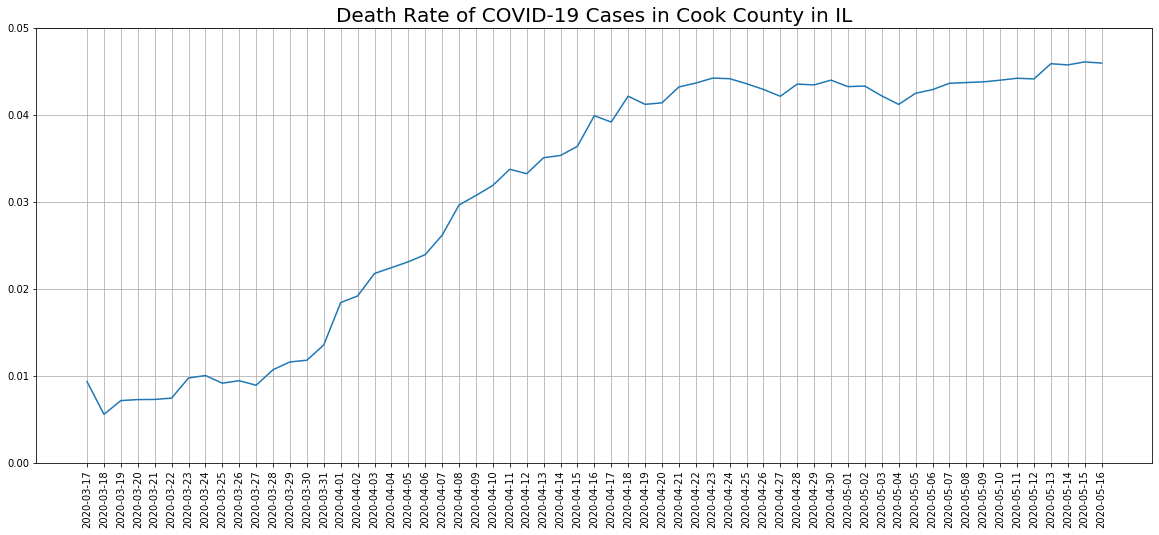

In [142]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook.index, covid_data_IL_Cook.death_rate)

y_ticks = np.linspace(0,0.05,6)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [143]:
covid_data_latest[covid_data_latest['state'] == 'Michigan'].sort_values(by='cases', ascending=False)

,date,county,state,cases,deaths,death_rate,State_County,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
65729,2020-05-16,Wayne County,Michigan,19016,2212,0.116323,Michigan_Wayne County,1749343.0,1087.036676,126.447472,0.962989,0.992171,0.993950,0.030961
64696,2020-05-16,Oakland County,Michigan,8023,910,0.113424,Michigan_Oakland County,1257584.0,637.969313,72.360972,0.919929,0.974021,0.989324,0.069395
64007,2020-05-16,Macomb County,Michigan,6304,739,0.117227,Michigan_Macomb County,873972.0,721.304573,84.556485,0.932740,0.979004,0.977936,0.045196
63585,2020-05-16,Kent County,Michigan,2766,54,0.019523,Michigan_Kent County,656955.0,421.033404,8.219741,0.864413,0.728826,0.965125,0.100712
65542,2020-05-16,Unknown County,Michigan,2336,59,0.025257,Michigan_Unknown County,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62756,2020-05-16,Genesee County,Michigan,1845,230,0.124661,Michigan_Genesee County,405813.0,454.642902,56.676351,0.875445,0.958719,0.939146,0.063701
65661,2020-05-16,Washtenaw County,Michigan,1241,88,0.070911,Michigan_Washtenaw County,367601.0,337.594294,23.938999,0.817082,0.877580,0.932384,0.115302
65175,2020-05-16,Saginaw County,Michigan,903,97,0.107420,Michigan_Saginaw County,190539.0,473.918725,50.908213,0.879004,0.952669,0.877936,-0.001068
63465,2020-05-16,Kalamazoo County,Michigan,708,42,0.059322,Michigan_Kalamazoo County,265066.0,267.103287,15.845110,0.762633,0.830249,0.909609,0.146975
63190,2020-05-16,Ingham County,Michigan,643,21,0.032659,Michigan_Ingham County,292406.0,219.899728,7.181795,0.719217,0.708541,0.917082,0.197865


In [144]:
whos

Variable                   Type         Data/Info
-------------------------------------------------
FuncFormatter              type         <class 'matplotlib.ticker.FuncFormatter'>
USA_pop_county             DataFrame              State          <...>\n[3194 rows x 4 columns]
cases_day0                 int64        543
county_list1               list         n=20
county_list2               list         n=20
covid_IL_daily             DataFrame                newcases_dail<...>\n\n[67 rows x 2 columns]
covid_MI_OAK               DataFrame                cases  deaths<...>\n\n[67 rows x 3 columns]
covid_MI_OAK_cum           DataFrame                cases  deaths<...>               0.015625  
covid_MI_OAK_daily         DataFrame                newcases_dail<...>\n\n[67 rows x 2 columns]
covid_MI_OAK_deathrate     DataFrame                cases  deaths<...> 8023     910    0.113424
covid_MI_OAK_pct           DataFrame                cases_dailypc<...>28               0.015625
covid_MI_Way